In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt
from scipy.stats import linregress

# Import the financialmodelingprep API key
from config import financial_api_key

In [2]:
# Set the API base URL for Income Statements
#https://financialmodelingprep.com/api/v3/income-statement/AAPL?period=quarter&limit=400&apikey=
income_base_url = "https://financialmodelingprep.com/api/v3/income-statement/"

SYM = 'AAPL'
income_query_url = f"{income_base_url}{SYM}?period=quarter?apikey={financial_api_key}"
#print(income_query_url)

#API Data provided by Financial Modeling Prep https://financialmodelingprep.com/developer/docs/

In [3]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
corporate_income_statement_data = pd.read_csv("Resources/publiccompaniesandsectors.csv")

# Display sample data
corporate_income_statement_data

,Company Name,SYM,Sector
0,Alder BioPharmaceuticals Inc.,ALDR,BioTech & Pharma
1,Alaska Air Group Inc.,ALK,Airlines
2,Amazon com Inc.,AMZN,Retail and Ecommerce
3,Anchor Bancorp,ANCB,Banks
4,Aptevo Therapeutics Inc.,APVO,BioTech & Pharma
...,...,...,...
68,Aval,AVLR,Taxes
69,Columbia Banking Inc.,COLB,Banks
70,eXp World Inc.,EXPI,Real Estate Services
71,Mr Cooper Group Inc.,COOP,Insurance


In [4]:
#identify tickers needed from washington corportions dataframe
income_ticker_list=corporate_income_statement_data["SYM"]
income_ticker_list

##Create an empty list to collect data from API pull
income_financial_data = []

#loop through api to fetch data for all Washington Corproations
for count, symbol in enumerate(income_ticker_list):
    symbol = str(symbol)
    #for debugging:
    #print(f'reading ticker {count} {symbol}')
    #if count > 10:
        #print("DEBUT BREAK!")
        #break
    if symbol == 'nan':
        continue
        
    income_query_url = f"{income_base_url}{symbol}?period=quarter&apikey={financial_api_key}"
    print(f'symbol={symbol}, query={income_query_url}')
    
    income_financial_statement_data = requests.get(income_query_url).json()[0]
    #print(f'symbol={symbol}, query={query_url}')
    #print(income_financial_statement_data)
  
    #print(income_statement_data[0])
    #print(income_statement_data[1])

    ticker = income_financial_statement_data['symbol']
    date = income_financial_statement_data['date']
    fillingDate = income_financial_statement_data['fillingDate']
    calendarYear = income_financial_statement_data['calendarYear']
    period = income_financial_statement_data ['period']
    costOfRevenue = income_financial_statement_data['costOfRevenue']
    grossProfit = income_financial_statement_data['grossProfit']
    grossProfitRatio = income_financial_statement_data['grossProfitRatio']
    researchAndDevelopmentExpenses = income_financial_statement_data['researchAndDevelopmentExpenses']
    generalAndAdministrativeExpenses = income_financial_statement_data['generalAndAdministrativeExpenses']
    sellingAndMarketingExpenses = income_financial_statement_data['sellingAndMarketingExpenses']
    sellingGeneralAndAdministrativeExpenses = income_financial_statement_data['sellingGeneralAndAdministrativeExpenses']
    otherExpenses = income_financial_statement_data['otherExpenses']
    operatingExpenses = income_financial_statement_data['operatingExpenses']
    costAndExpenses = income_financial_statement_data['costAndExpenses']
    interestIncome = income_financial_statement_data ['interestIncome']
    interestExpense = income_financial_statement_data['interestExpense']
    depreciationAndAmortization = income_financial_statement_data['depreciationAndAmortization']
    ebitda = income_financial_statement_data['ebitda']
    ebitdaratio = income_financial_statement_data['ebitdaratio']
    operatingIncome = income_financial_statement_data['operatingIncome']
    operatingIncomeRatio = income_financial_statement_data['operatingIncomeRatio']
    totalOtherIncomeExpensesNet = income_financial_statement_data['totalOtherIncomeExpensesNet']
    incomeBeforeTax = income_financial_statement_data['incomeBeforeTax']
    incomeBeforeTaxRatio = income_financial_statement_data['incomeBeforeTaxRatio']
    incomeTaxExpense = income_financial_statement_data['incomeTaxExpense']
    netIncome = income_financial_statement_data['netIncome']
    netIncomeRatio = income_financial_statement_data['netIncomeRatio']
    eps = income_financial_statement_data['eps']
    epsdiluted = income_financial_statement_data['epsdiluted']
    weightedAverageShsOut = income_financial_statement_data['weightedAverageShsOut']
    weightedAverageShsOutDil = income_financial_statement_data['weightedAverageShsOutDil']
        
    #append to list
    income_financial_data.append({"Ticker":symbol,
                                  "Date": date,
                                  "Filing Date": fillingDate,
                                  "Calendar Year": calendarYear,
                                  "Period": period,
                                  "Cost of Revenue": costOfRevenue,
                                  "Gross Profit": grossProfit,
                                  "Gross Profit Ratio": grossProfitRatio,
                                  "R & D Expenses": researchAndDevelopmentExpenses,
                                  "General & Administrative Expenses": generalAndAdministrativeExpenses,
                                  "Sales & Marketing Expenses":  sellingAndMarketingExpenses,
                                  "Sales & General Admin. Expenses": sellingGeneralAndAdministrativeExpenses,
                                  "Other Expenses": otherExpenses, 
                                  "Operating Expenses":operatingExpenses,
                                  "Costs and Expenses":costAndExpenses,
                                  "Interest Income":interestIncome, 
                                  "Interest Expense": interestExpense, 
                                  "Deprecation & Amoratization": depreciationAndAmortization,
                                  "Ebitda": ebitda,
                                  "Ebitda Ratio": ebitdaratio, 
                                  "Operating Income": operatingIncome,
                                  "Operating Income Ratio": operatingIncomeRatio,
                                  "Total Other Income Expense Net": totalOtherIncomeExpensesNet,
                                  "Income Before Tax": incomeBeforeTax,
                                  "Income Before Tax Ration": incomeBeforeTaxRatio,
                                  "Income Tax Expense": incomeTaxExpense,
                                  "Net Income":netIncome,
                                  "Net Income Ration": netIncomeRatio, 
                                  "EPS": eps,
                                  "EPS": epsdiluted, 
                                  "Weighted Average Shares Out": weightedAverageShsOut,
                                  "Weighted Average Shares Out Diluted": weightedAverageShsOutDil}) 
                                  
                                  
                         
#convert the financial data into a dataframe
income_financial_data = pd.DataFrame.from_dict(income_financial_data)
income_financial_data
income_financial_data.to_csv("Resources/stocktickerincomedata.csv")

    

symbol=ALDR, query=https://financialmodelingprep.com/api/v3/income-statement/ALDR?period=quarter&apikey=90e712c3062ebab6be06de188b5c6b0a
symbol=ALK, query=https://financialmodelingprep.com/api/v3/income-statement/ALK?period=quarter&apikey=90e712c3062ebab6be06de188b5c6b0a
symbol=AMZN, query=https://financialmodelingprep.com/api/v3/income-statement/AMZN?period=quarter&apikey=90e712c3062ebab6be06de188b5c6b0a
symbol=ANCB, query=https://financialmodelingprep.com/api/v3/income-statement/ANCB?period=quarter&apikey=90e712c3062ebab6be06de188b5c6b0a
symbol=APVO, query=https://financialmodelingprep.com/api/v3/income-statement/APVO?period=quarter&apikey=90e712c3062ebab6be06de188b5c6b0a
symbol=ATOS, query=https://financialmodelingprep.com/api/v3/income-statement/ATOS?period=quarter&apikey=90e712c3062ebab6be06de188b5c6b0a
symbol=AVA, query=https://financialmodelingprep.com/api/v3/income-statement/AVA?period=quarter&apikey=90e712c3062ebab6be06de188b5c6b0a
symbol=BANR, query=https://financialmodelingp

symbol=Z, query=https://financialmodelingprep.com/api/v3/income-statement/Z?period=quarter&apikey=90e712c3062ebab6be06de188b5c6b0a
symbol=ZUMZ, query=https://financialmodelingprep.com/api/v3/income-statement/ZUMZ?period=quarter&apikey=90e712c3062ebab6be06de188b5c6b0a
symbol=ACHV, query=https://financialmodelingprep.com/api/v3/income-statement/ACHV?period=quarter&apikey=90e712c3062ebab6be06de188b5c6b0a
symbol=ADPT, query=https://financialmodelingprep.com/api/v3/income-statement/ADPT?period=quarter&apikey=90e712c3062ebab6be06de188b5c6b0a
symbol=ALPN, query=https://financialmodelingprep.com/api/v3/income-statement/ALPN?period=quarter&apikey=90e712c3062ebab6be06de188b5c6b0a
symbol=AVLR, query=https://financialmodelingprep.com/api/v3/income-statement/AVLR?period=quarter&apikey=90e712c3062ebab6be06de188b5c6b0a
symbol=COLB, query=https://financialmodelingprep.com/api/v3/income-statement/COLB?period=quarter&apikey=90e712c3062ebab6be06de188b5c6b0a
symbol=EXPI, query=https://financialmodelingpre

In [5]:
year_2022_data = income_financial_data[(income_financial_data["Calendar Year"] == "2022")]
year_2021_data = income_financial_data[(income_financial_data["Calendar Year"] == "2021")]
year_2020_data = income_financial_data[(income_financial_data["Calendar Year"] == "2020")]
year_2019_data = income_financial_data[(income_financial_data["Calendar Year"] == "2019")]
year_2018_data = income_financial_data[(income_financial_data["Calendar Year"] == "2018")]
#year_2022_data.head()

fourth_quarter_net_income2022 = year_2022_data[(year_2022_data["Period"]== "Q4")]
fourth_quarter_net_income2021 = year_2021_data[(year_2021_data["Period"]== "Q4")]
fourth_quarter_net_income2020 = year_2020_data[(year_2020_data["Period"]== "Q4")]
fourth_quarter_net_income2019 = year_2019_data[(year_2019_data["Period"]== "Q4")]
fourth_quarter_net_income2018 = year_2018_data[(year_2018_data["Period"]== "Q4")]
fourth_quarter_net_income2022

,Ticker,Date,Filing Date,Calendar Year,Period,Cost of Revenue,Gross Profit,Gross Profit Ratio,R & D Expenses,General & Administrative Expenses,...,Operating Income Ratio,Total Other Income Expense Net,Income Before Tax,Income Before Tax Ration,Income Tax Expense,Net Income,Net Income Ration,EPS,Weighted Average Shares Out,Weighted Average Shares Out Diluted
2,AMZN,2022-12-31,2023-02-03,2022,Q4,129557000000,19647000000,0.131679,20814000000,3333000000,...,0.018344,-3699000000,-962000000,-0.006448,5207000000,-6153000000,-0.041239,-0.600,10189000000,10189000000
21,EXPE,2022-12-31,2023-02-10,2022,Q4,412000000,2206000000,0.842628,317000000,186000000,...,0.048892,55000000,183000000,0.069901,8000000,177000000,0.067609,1.110,155404000,159532000
27,FTV,2022-12-31,2022-12-31,2022,Q4,637400000,892500000,0.583371,101200000,0,...,0.190143,-33900000,257000000,0.167985,29800000,227200000,0.148506,0.630,355200000,357900000
43,PCAR,2022-12-31,2022-12-31,2022,Q4,6505200000,1229500000,0.158959,99900000,0,...,0.125124,19700000,987500000,0.127671,254200000,921300000,0.119113,2.640,348600000,349200000
44,PCH,2022-12-31,2022-12-31,2022,Q4,214765000,38375000,0.151596,0,0,...,0.041815,-11465000,-880000,-0.003476,4723000,3843000,0.015181,0.048,80356000,80578000
69,TBI,2022-12-25,2022-12-25,2022,Q4,409846000,147849000,0.265107,0,0,...,0.012297,133000,6991000,0.012536,54000,7045000,0.012632,0.210,32486000,33014000


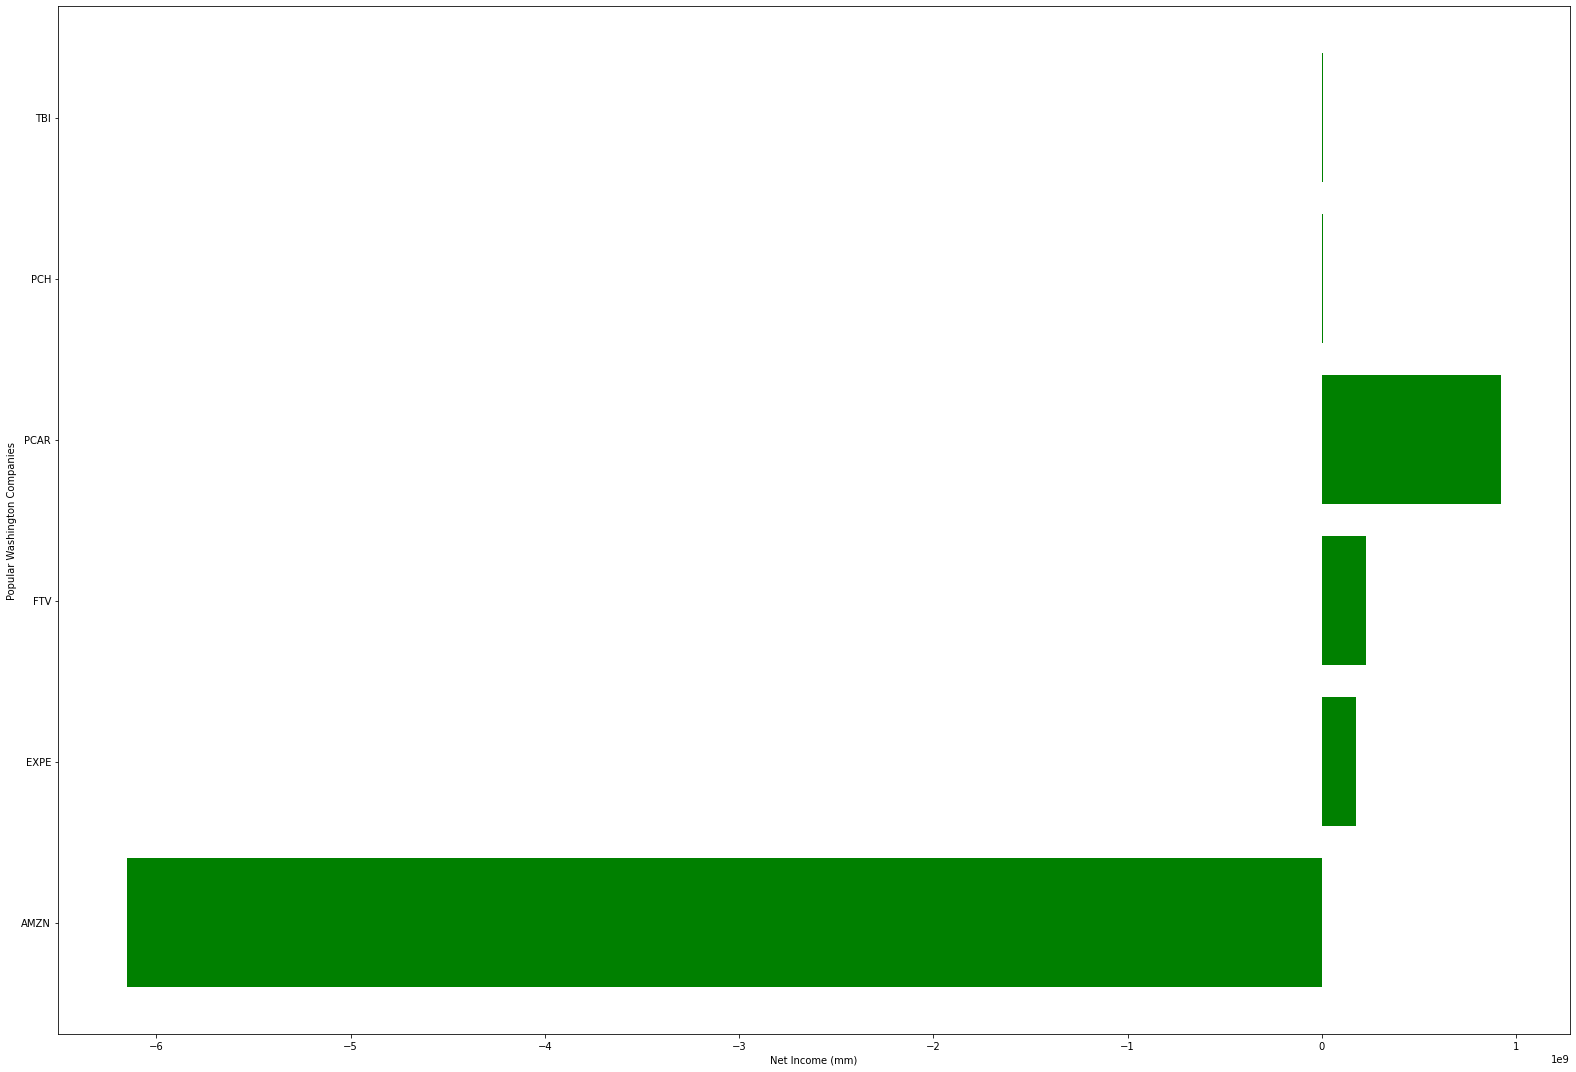

In [6]:
#show total current assets of each company in 2019
plt.rcParams["figure.figsize"] = [22, 15]
plt.rcParams["figure.autolayout"] = True
plt.barh(fourth_quarter_net_income2022['Ticker'], fourth_quarter_net_income2022['Net Income'], color = 'g')
plt.xlabel("Net Income (mm)")
plt.ylabel('Popular Washington Companies')
plt.savefig("NetIncome4QTR2022.png")
plt.show()


In [1]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
plt.barh(fourth_quarter_net_income2021['Ticker'], fourth_quarter_net_income2021['Net Income'], color = 'b')
plt.xlabel("Net Income (mm)")
plt.ylabel('Popular Washington Companies')
plt.text(10, 10, "medium")
plt.savefig("NetIncome4QTR2022.png")
plt.show()

NameError: name 'plt' is not defined